In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib


In [3]:
# ganti path sesuai lokasi file
df = pd.read_csv("student.csv")

print("Shape:", df.shape)
print("Kolom:", df.columns.tolist())
df.head()


Shape: (10000, 6)
Kolom: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.

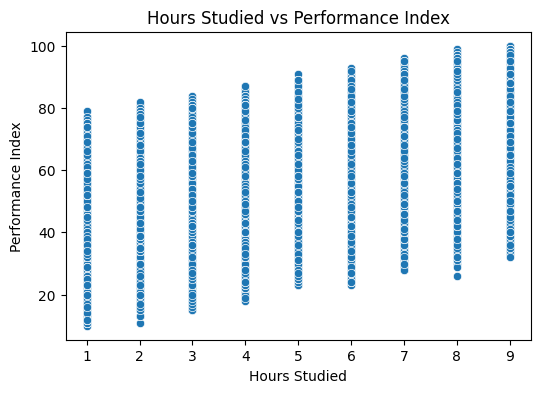

In [4]:
print(df.info())
print(df.describe())
print("\nMissing values per kolom:\n", df.isnull().sum())

# Scatterplot: Hours Studied vs Performance Index
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours Studied", y="Performance Index", data=df)
plt.title("Hours Studied vs Performance Index")
plt.show()


In [5]:
# Konversi kolom kategorikal: Extracurricular Activities
df['Extracurricular'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})

# Pilih fitur dan target
feature_cols = ['Hours Studied','Previous Scores','Extracurricular',
                'Sleep Hours','Sample Question Papers Practiced']
X = df[feature_cols]
y = df['Performance Index']

X.head()


,Hours Studied,Previous Scores,Extracurricular,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² :", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(feature_cols, model.coef_):
    print(f"{col}: {coef:.4f}")


R² : 0.9889832909573145
RMSE: 2.0205515085050054
Intercept: -33.921946215556126
Coefficients:
Hours Studied: 2.8525
Previous Scores: 1.0170
Extracurricular: 0.6086
Sleep Hours: 0.4769
Sample Question Papers Practiced: 0.1918


In [12]:
bundle = {"model": model, "feature_cols": feature_cols}
joblib.dump(bundle, "model_student_bundle.pkl")

print("Model disimpan sebagai model_student_bundle.pkl")


Model disimpan sebagai model_student_bundle.pkl


In [8]:
# contoh input: Hours=6, Prev=80, Extracurricular=Yes, Sleep=7, Papers=3
x_new = np.array([[6, 80, 1, 7, 3]])
pred = model.predict(x_new)[0]
print("Prediksi Performance Index:", round(float(pred),2))


Prediksi Performance Index: 69.07


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
